In [1]:
from powerspectra import Powerspectra
from modecoupling import Modecoupling
import matplotlib.pyplot as plt
import matplotlib
from cosmology import Cosmology
import numpy as np
from noise import Noise

In [2]:
plt.rcParams['figure.figsize'] = [10, 5]

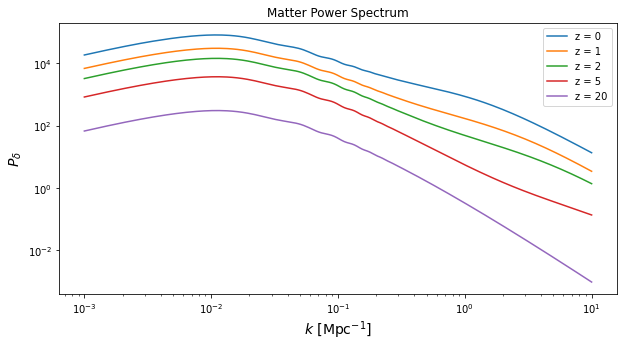

In [3]:
# Matter Powe Spectrum
power = Powerspectra()
ks = np.logspace(-3, 1, 200)
zs = np.array([0, 1, 2, 5, 20])

plt.figure()
for z in zs:
    ps = power.get_matter_ps("matter", z, ks)
    plt.loglog(ks, ps, label=f"z = {z}")
    plt.ylabel("$P_{\delta}$", fontsize=14)
    plt.xlabel("$k$ [Mpc$^{-1}$]", fontsize=14)
    plt.title("Matter Power Spectrum")
plt.legend()
plt.show()

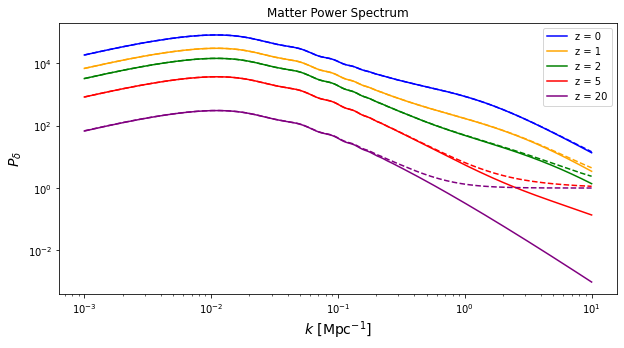

In [4]:
plt.figure()
colours = ["blue", "orange", "green", "red", "purple"]
for iii, z in enumerate(zs):
    ps = power.get_matter_ps("matter", z, ks)
    ps1 = power.get_matter_ps("matter", z, ks) + 1
    plt.loglog(ks, ps, label=f"z = {z}", color=colours[iii])
    plt.loglog(ks, ps1, linestyle="--", color=colours[iii])
    plt.ylabel("$P_{\delta}$", fontsize=14)
    plt.xlabel("$k$ [Mpc$^{-1}$]", fontsize=14)
    plt.title("Matter Power Spectrum")
plt.legend()
plt.show()

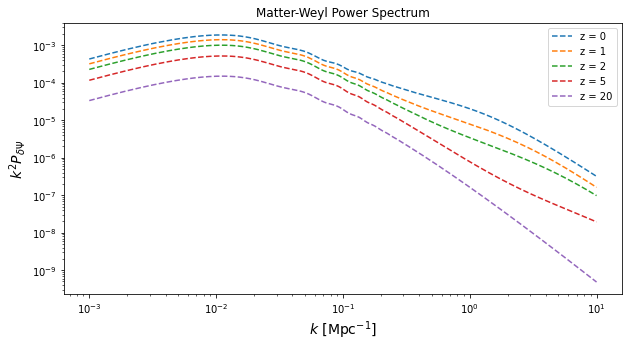

In [5]:
# Matter-Weyl Power Spectrum
power = Powerspectra()
ks = np.logspace(-3, 1, 200)
zs = np.array([0, 1, 2, 5, 20])

plt.figure()
for z in zs:
    ps = power.get_matter_ps("matter-weyl", z, ks)
    plt.loglog(ks, np.abs(ps), linestyle="--", label=f"z = {z}")
    plt.ylabel("$k^2P_{\delta\Psi}$", fontsize=14)
    plt.xlabel("$k$ [Mpc$^{-1}$]", fontsize=14)
    plt.title("Matter-Weyl Power Spectrum")
plt.legend()
plt.show()

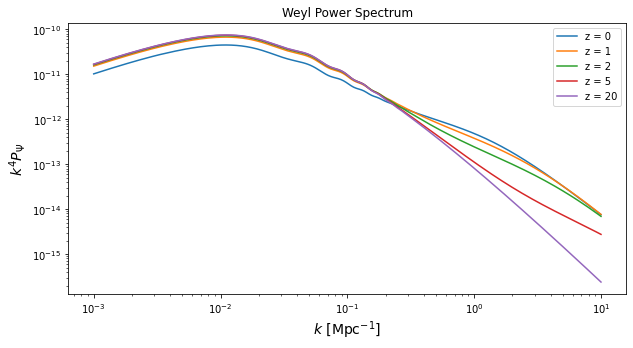

In [6]:
# Weyl Potential Power Spectrum
power = Powerspectra()
ks = np.logspace(-3, 1, 200)
zs = np.array([0, 1, 2, 5, 20])

plt.figure()
for z in zs:
    ps = power.get_matter_ps("weyl", z, ks)
    plt.loglog(ks, ps, label=f"z = {z}")
    plt.ylabel("$k^4P_{\Psi}$", fontsize=14)
    plt.xlabel("$k$ [Mpc$^{-1}$]", fontsize=14)
    plt.title("Weyl Power Spectrum")
plt.legend()
plt.show()

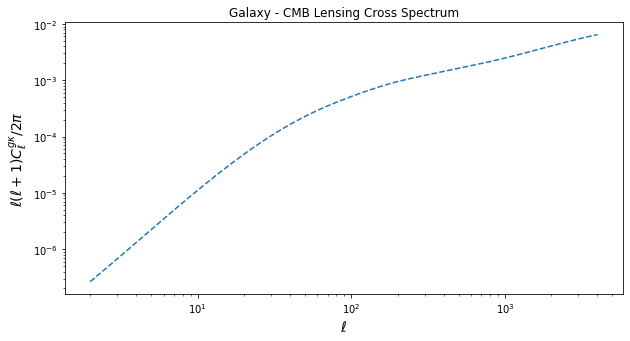

In [7]:
cosmo = Cosmology()
Chi_str = cosmo.get_chi_star()
ellmax = 4000
ells = np.arange(2, ellmax + 1, 1)
Cl_gk = power.get_gal_kappa_ps(ells, Chi_str)
plt.figure()
#plt.loglog(ells, np.abs(Cl_gk)*(ells*(ells + 1))**2/(2*np.pi))
plt.loglog(ells, np.abs(Cl_gk)*(ells*(ells + 1))/(2*np.pi), linestyle="--")
#plt.loglog(ells, np.abs(Cl_gk), linestyle="--")
plt.ylabel("$\ell(\ell+1)C_{\ell}^{g\kappa}/2\pi$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.title("Galaxy - CMB Lensing Cross Spectrum")
plt.show()

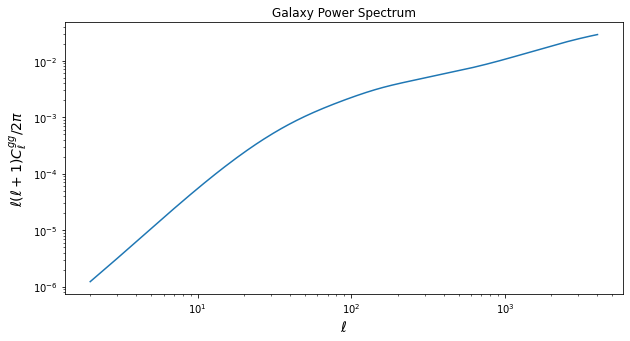

In [8]:
ellmax = 4000
ells = np.arange(2, ellmax + 1, 1)
Cl_gg = power.get_gal_ps(ells)
plt.figure()
#plt.loglog(ells, np.abs(Cl_gg)*(ells*(ells + 1))**2/(2*np.pi))
plt.loglog(ells, Cl_gg*(ells*(ells + 1))/(2*np.pi))
#plt.loglog(ells, Cl_gg)
plt.ylabel("$\ell(\ell+1)C_{\ell}^{gg}/2\pi$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.title("Galaxy Power Spectrum")
plt.show()

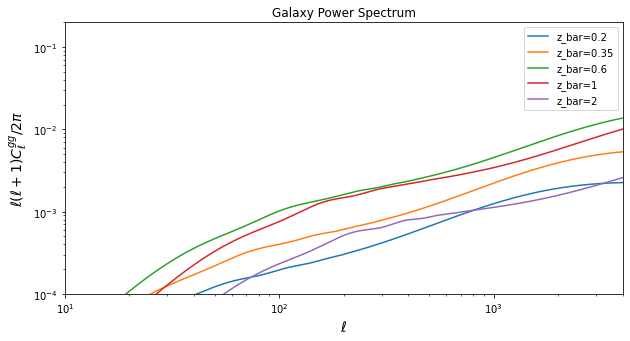

In [9]:
bins_min = [0.06, 0.25, 0.41, 0.75, 1.19]
bins_max = [0.33, 0.46, 0.78, 1.3, 2.85]
bins = [0.2, 0.35, 0.6, 1, 2]
for iii, binn in enumerate(bins):
    Cl_gg = power.get_gal_ps(ells, Nchi=1000, gal_win_zmin=bins_min[iii], gal_win_zmax=bins_max[iii])
    plt.loglog(ells, Cl_gg*(ells*(ells + 1))/(2*np.pi), label=f"z_bar={binn}")
plt.ylabel("$\ell(\ell+1)C_{\ell}^{gg}/2\pi$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.title("Galaxy Power Spectrum")
plt.xlim(1e1, 4e3)
plt.ylim(1e-4, 2e-1)
plt.legend()
plt.show()

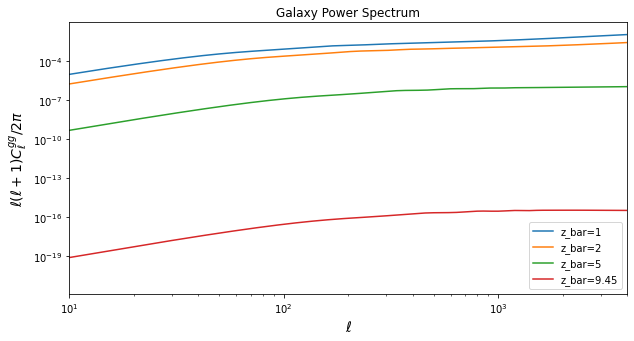

In [10]:
bins_min = [0.75, 1.19, 2.85, 7.04]
bins_max = [1.3, 2.85, 7.04, 11.85]
bins = [1, 2, 5, 9.45]
for iii, binn in enumerate(bins):
    Cl_gg = power.get_gal_ps(ells, gal_win_zmin=bins_min[iii], gal_win_zmax=bins_max[iii])
    plt.loglog(ells, Cl_gg*(ells*(ells + 1))/(2*np.pi), label=f"z_bar={binn}")
plt.ylabel("$\ell(\ell+1)C_{\ell}^{gg}/2\pi$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.title("Galaxy Power Spectrum")
plt.xlim(1e1, 4e3)

plt.legend()
plt.show()

/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:121: RuntimeWarning: divide by zero encountered in reciprocal
  small_nu = (np.exp(thing) - 1) ** -1 * 2 * nu ** pow
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:122: RuntimeWarning: divide by zero encountered in reciprocal
  big_nu = (np.exp(thing) - 1)**-1 * nu_prim**pow * (nu/nu_prim)**-alpha


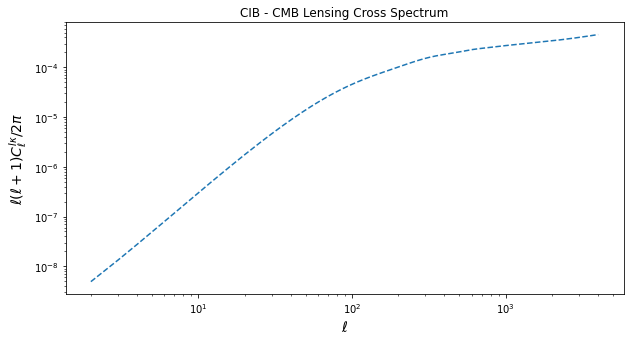

In [11]:
cosmo = Cosmology()
Chi_str = cosmo.get_chi_star()
ellmax = 4000
ells = np.arange(2, ellmax + 1, 1)
nu=353e9
bias = 0.4
Cl_Ik = power.get_cib_kappa_ps(ells, nu, Chi_str, bias=bias)
plt.figure()
#plt.loglog(ells, np.abs(Cl_gk)*(ells*(ells + 1))**2/(2*np.pi))
plt.loglog(ells, np.abs(Cl_Ik)*(ells*(ells + 1))/(2*np.pi), linestyle="--")
#plt.semilogy(ells, np.abs(Cl_Ik), linestyle="--")
plt.ylabel("$\ell(\ell+1)C_{\ell}^{I\kappa}/2\pi$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.title("CIB - CMB Lensing Cross Spectrum")
plt.show()

/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:121: RuntimeWarning: divide by zero encountered in reciprocal
  small_nu = (np.exp(thing) - 1) ** -1 * 2 * nu ** pow
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:122: RuntimeWarning: divide by zero encountered in reciprocal
  big_nu = (np.exp(thing) - 1)**-1 * nu_prim**pow * (nu/nu_prim)**-alpha


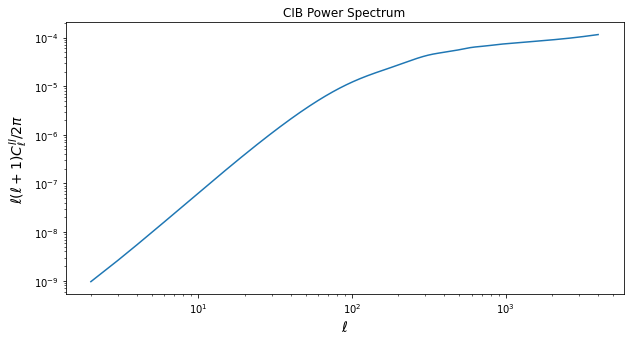

In [12]:
Chi_str = cosmo.get_chi_star()
ellmax = 4000
ells = np.arange(2, ellmax + 1, 1)
Cl_II = power.get_cib_ps(ells, nu, bias=bias)
plt.figure()
#plt.loglog(ells, np.abs(Cl_gg)*(ells*(ells + 1))**2/(2*np.pi))
plt.loglog(ells, Cl_II*(ells*(ells + 1))/(2*np.pi))
#plt.semilogy(ells, Cl_II)
plt.ylabel("$\ell(\ell+1)C_{\ell}^{II}/2\pi$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.title("CIB Power Spectrum")
plt.show()

/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:121: RuntimeWarning: divide by zero encountered in reciprocal
  small_nu = (np.exp(thing) - 1) ** -1 * 2 * nu ** pow
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:122: RuntimeWarning: divide by zero encountered in reciprocal
  big_nu = (np.exp(thing) - 1)**-1 * nu_prim**pow * (nu/nu_prim)**-alpha
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:121: RuntimeWarning: divide by zero encountered in reciprocal
  small_nu = (np.exp(thing) - 1) ** -1 * 2 * nu ** pow
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:122: RuntimeWarning: divide by zero encountered in reciprocal
  big_nu = (np.exp(thing) - 1)**-1 * nu_prim**pow * (nu/nu_prim)**-alpha
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:121: RuntimeWarning: divide by zero encountered in reciprocal
  small_nu = (np.exp(thing) - 1) ** -1 * 2 * nu ** pow
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:122: RuntimeWarning: divide by 

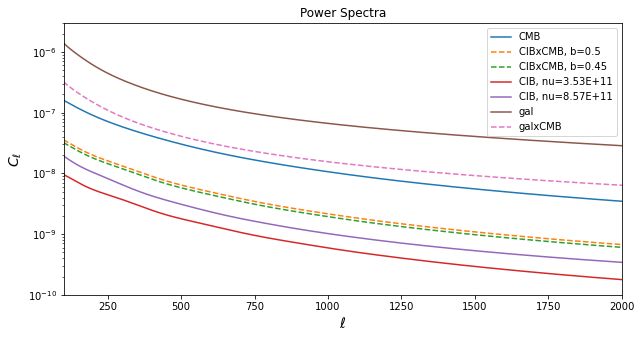

In [13]:
Chi_str = cosmo.get_chi_star()
ellmax = 4000
ells = np.arange(2, ellmax + 1, 1)
plt.figure()
Cl_kk = power.get_kappa_ps(ells)
Cl_gg = power.get_gal_ps(ells)
plt.semilogy(ells, Cl_kk, label="CMB")
nu = 353e9
bias = 0.5
Cl_Ik = power.get_cib_kappa_ps(ells, nu, Chi_str, bias=bias)
plt.semilogy(ells, np.abs(Cl_Ik), linestyle="--", label=f"CIBxCMB, b={bias}")
bias = 0.45
Cl_Ik = power.get_cib_kappa_ps(ells, nu, Chi_str, bias=bias)
plt.semilogy(ells, np.abs(Cl_Ik), linestyle="--", label=f"CIBxCMB, b={bias}")
Cl_II = power.get_cib_ps(ells, nu, bias=bias)
plt.semilogy(ells, Cl_II, label=f"CIB, nu={nu:.2E}")
nu = 857e9
Cl_II = power.get_cib_ps(ells, nu, bias=bias)
plt.semilogy(ells, Cl_II, label=f"CIB, nu={nu:.2E}")
plt.semilogy(ells, Cl_gg, label=f"gal")
plt.semilogy(ells, np.abs(Cl_gk), linestyle="--", label="galxCMB")
plt.xlim(100,2000)
plt.ylim(1e-10, 3e-6)
plt.ylabel("$C_{\ell}$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.title("Power Spectra")
plt.legend()
plt.show()

/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:121: RuntimeWarning: divide by zero encountered in reciprocal
  small_nu = (np.exp(thing) - 1) ** -1 * 2 * nu ** pow
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:122: RuntimeWarning: divide by zero encountered in reciprocal
  big_nu = (np.exp(thing) - 1)**-1 * nu_prim**pow * (nu/nu_prim)**-alpha
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:121: RuntimeWarning: overflow encountered in exp
  small_nu = (np.exp(thing) - 1) ** -1 * 2 * nu ** pow
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:121: RuntimeWarning: divide by zero encountered in reciprocal
  small_nu = (np.exp(thing) - 1) ** -1 * 2 * nu ** pow
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:122: RuntimeWarning: overflow encountered in exp
  big_nu = (np.exp(thing) - 1)**-1 * nu_prim**pow * (nu/nu_prim)**-alpha
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:122: RuntimeWarning: divide by zero encountered in recipr

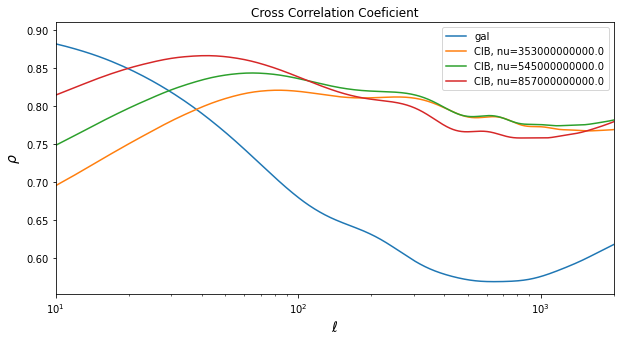

In [14]:
_noise=Noise()
N_g = _noise.get_gal_shot_N()
Cl_kk = power.get_kappa_ps(ells)
corr_gg = Cl_gk/(np.sqrt((Cl_gg + N_g[ells])*Cl_kk))
plt.semilogx(ells, np.abs(corr_gg), label="gal")
nus = [353e9, 545e9, 857e9]
for nu in nus:
    Cl_Ik = power.get_cib_kappa_ps(ells, nu, Chi_str)
    Cl_II = power.get_cib_ps(ells, nu)
    corr_II = Cl_Ik/(np.sqrt(Cl_II*Cl_kk))
    plt.semilogx(ells, np.abs(corr_II), label=f"CIB, nu={nu}")
plt.ylabel(r"$\rho$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.xlim(10,2000)
plt.legend()
plt.title("Cross Correlation Coeficient")
plt.show()

In [15]:
print(cosmo.z_to_Chi(4))
print(cosmo.get_hubble(0))

7340.962539571486
0.00022637934407271473


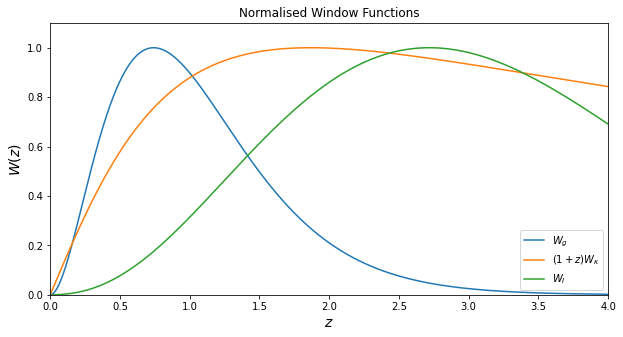

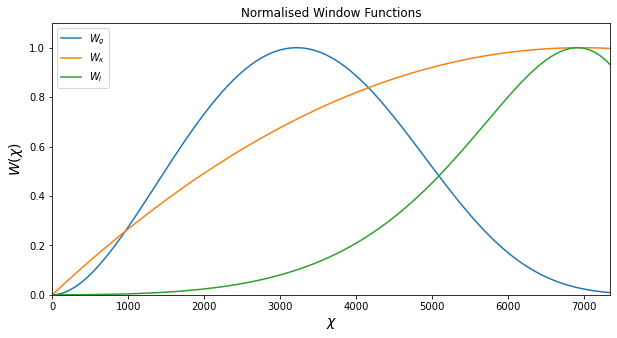

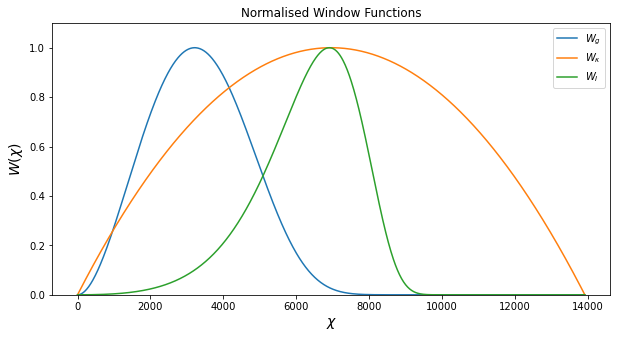

In [16]:
Chi_str = cosmo.get_chi_star()
ellmax = 4000
ells = np.arange(2, ellmax + 1, 1)
Chis = np.linspace(1, cosmo.z_to_Chi(10), 1000)
zs = cosmo.Chi_to_z(Chis)
gal_window_z = cosmo.gal_cluster_window_z(zs)
gal_window_Chi = cosmo.gal_cluster_window_Chi(Chis)
cmb_window_Chi = cosmo.cmb_lens_window(Chis, Chi_str)
cmb_window_z = (1+zs)*cmb_window_Chi/cosmo.get_hubble(zs)
nu = 353e9
cib_window_z = cosmo.cib_window_z(zs, nu)
cib_window_Chi = cosmo.cib_window_Chi(Chis, nu)
plt.figure()
plt.plot(zs, gal_window_z/np.max(gal_window_z), label="$W_g$")
plt.plot(zs, Chis**2*cmb_window_z/np.max(Chis**2*cmb_window_z), label="$(1+z)W_{\kappa}$")
plt.plot(zs, cib_window_z/((np.max(cib_window_z))), label="$W_{I}$")
plt.title("Normalised Window Functions")
plt.ylabel("$W(z)$", fontsize=14)
plt.xlabel("$z$", fontsize=14)
plt.xlim(0,4)
plt.ylim(0,1.1)
plt.legend()
plt.figure()
plt.plot(Chis, gal_window_Chi/np.max(gal_window_Chi), label="$W_g$")
plt.plot(Chis, Chis**2*cmb_window_Chi/np.max(Chis**2*cmb_window_Chi), label="$W_{\kappa}$")
plt.plot(Chis, cib_window_Chi/np.max(cib_window_Chi), label="$W_{I}$")
plt.title("Normalised Window Functions")
plt.ylabel("$W(\chi)$", fontsize=14)
plt.xlabel("$\chi$", fontsize=14)
plt.ylim(0,1.1)
plt.xlim(0,7340)
plt.legend()
plt.figure()
Chis = np.linspace(1, Chi_str, 1000)
gal_window_Chi = cosmo.gal_cluster_window_Chi(Chis)
cmb_window_Chi = cosmo.cmb_lens_window(Chis, Chi_str)
cib_window_Chi = cosmo.cib_window_Chi(Chis, nu)
plt.plot(Chis, gal_window_Chi/np.max(gal_window_Chi), label="$W_g$")
plt.plot(Chis, Chis**2*cmb_window_Chi/np.max(Chis**2*cmb_window_Chi), label="$W_{\kappa}$")
plt.plot(Chis, cib_window_Chi/np.max(cib_window_Chi), label="$W_{I}$")
plt.title("Normalised Window Functions")
plt.ylabel("$W(\chi)$", fontsize=14)
plt.xlabel("$\chi$", fontsize=14)
plt.ylim(0,1.1)
plt.legend()
plt.show()

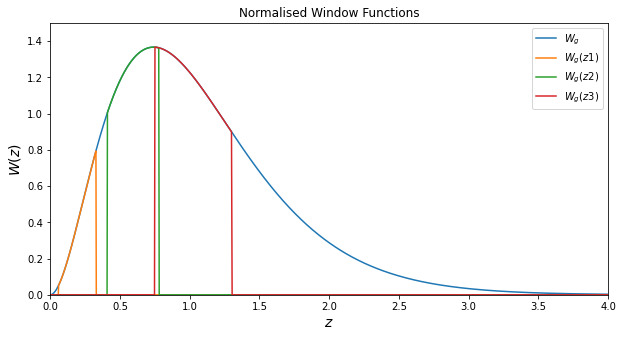

In [17]:
gal_window_z = cosmo.gal_cluster_window_z(zs)
gal_window_z1 = cosmo.gal_cluster_window_z(zs, zmin=0.06, zmax=0.33)
gal_window_z2 = cosmo.gal_cluster_window_z(zs, zmin=0.41, zmax=0.78)
gal_window_z3 = cosmo.gal_cluster_window_z(zs, zmin=0.75, zmax=1.3)

plt.plot(zs, gal_window_z, label="$W_g$")
plt.plot(zs, gal_window_z1, label="$W_g(z1)$")
plt.plot(zs, gal_window_z2, label="$W_g(z2)$")
plt.plot(zs, gal_window_z3, label="$W_g(z3)$")
plt.title("Normalised Window Functions")
plt.ylabel("$W(z)$", fontsize=14)
plt.xlabel("$z$", fontsize=14)
plt.xlim(0,4)
plt.ylim(0,1.5)
plt.legend()
plt.show()

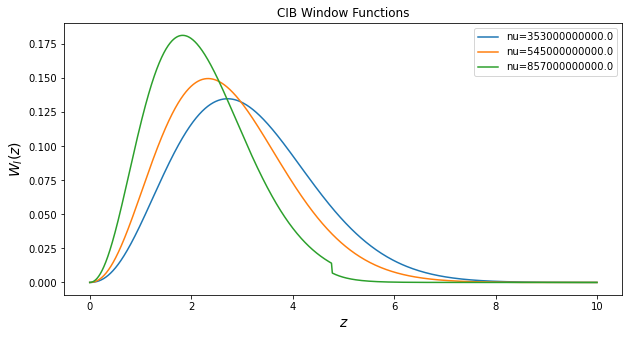

In [18]:
ellmax = 4000
ells = np.arange(2, ellmax + 1, 1)
Chis = np.linspace(1, cosmo.z_to_Chi(10), 1000)
zs = cosmo.Chi_to_z(Chis)
cib_window_z = cosmo.cib_window_z(zs)
cib_window_Chi = cosmo.cib_window_Chi(Chis)
nus = [353e9, 545e9, 857e9]
for nu in nus:
    cib_window_z = cosmo.cib_window_z(zs, nu=nu)
    plt.plot(zs, cib_window_z, label=f"nu={nu}")
plt.title("CIB Window Functions")
plt.ylabel("$W_{I}(z)$", fontsize=14)
plt.xlabel("$z$", fontsize=14)
plt.legend()
plt.show()

In [19]:
mode = Modecoupling()
ells1 = np.arange(1, 1000, 1)
ells2 = ells1
M_kk = mode.components(ells1, ells2, Nchi=100)

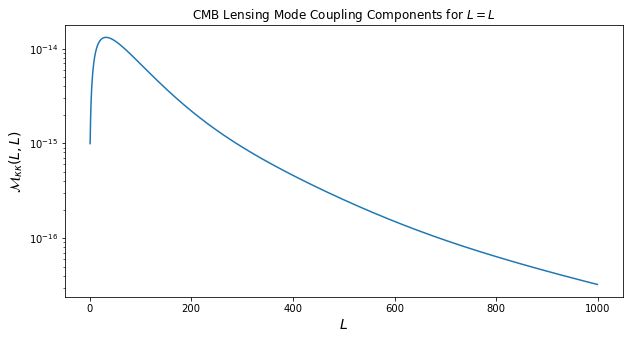

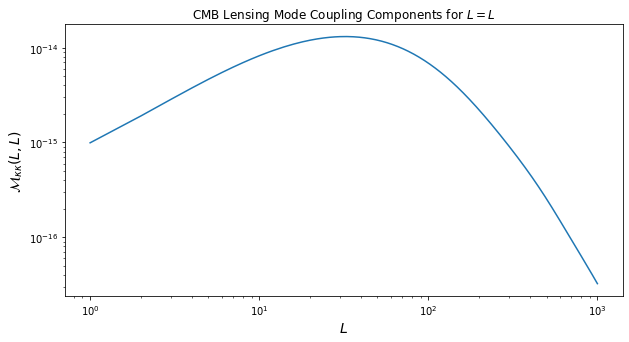

In [20]:
plt.figure()
plt.semilogy(ells1, M_kk)
plt.title("CMB Lensing Mode Coupling Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}_{\kappa\kappa}(L,L)$", fontsize=14)

plt.figure()
plt.loglog(ells1, M_kk)
plt.title("CMB Lensing Mode Coupling Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}_{\kappa\kappa}(L,L)$", fontsize=14)

plt.show()

In [21]:
mode = Modecoupling()
ells1 = np.arange(1, 1000, 1)
ells2 = ells1
M_gg = mode.components(ells1, ells2, typ="gal-gal", Nchi=100)

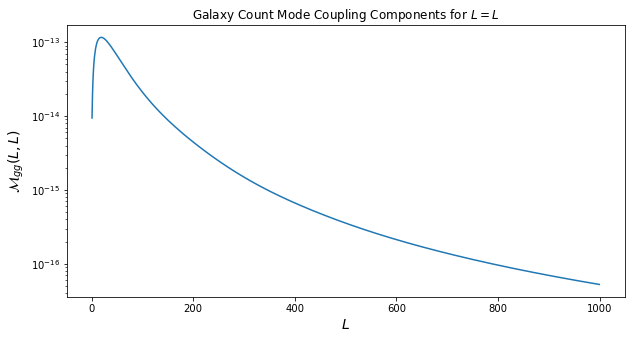

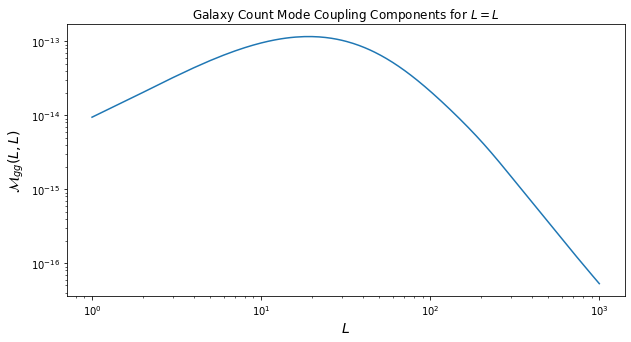

In [22]:
plt.figure()
plt.semilogy(ells1, M_gg)
plt.title("Galaxy Count Mode Coupling Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}_{gg}(L,L)$", fontsize=14)

plt.figure()
plt.loglog(ells1, M_gg)
plt.title("Galaxy Count Mode Coupling Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}_{gg}(L,L)$", fontsize=14)

plt.show()

In [23]:
mode = Modecoupling()
ells1 = np.arange(1, 1000, 1)
ells2 = ells1
M_gk = mode.components(ells1, ells2, typ="gal-kappa", Nchi=100)

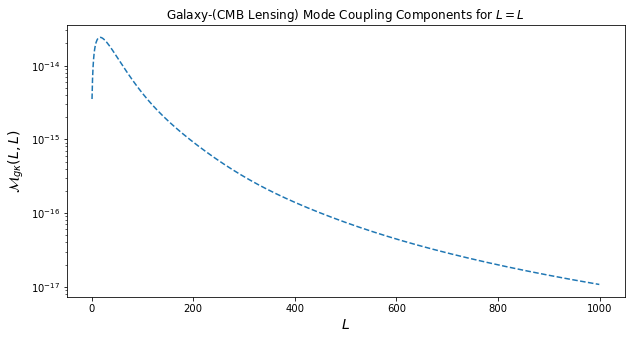

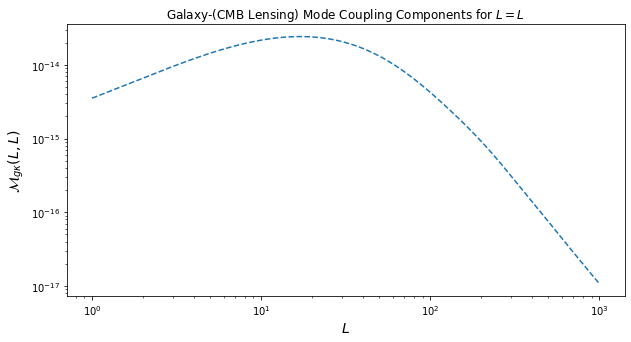

In [24]:
plt.figure()
plt.semilogy(ells1, np.abs(M_gk), linestyle="--")
plt.title("Galaxy-(CMB Lensing) Mode Coupling Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}_{g\kappa}(L,L)$", fontsize=14)

plt.figure()
plt.loglog(ells1, np.abs(M_gk), linestyle="--")
plt.title("Galaxy-(CMB Lensing) Mode Coupling Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}_{g\kappa}(L,L)$", fontsize=14)

plt.show()

In [25]:
mode = Modecoupling()
ells1 = np.arange(1, 1000, 1)
ells2 = ells1
M_kg = mode.components(ells1, ells2, typ="kappa-gal", Nchi=100)

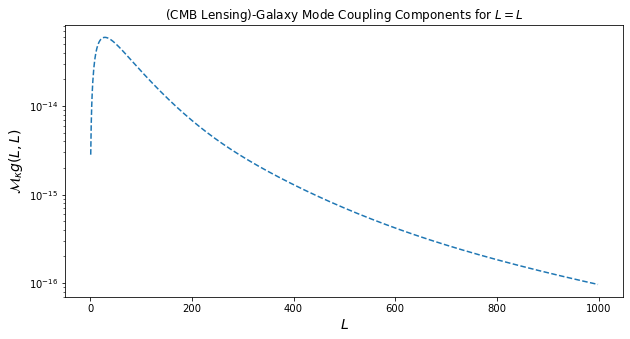

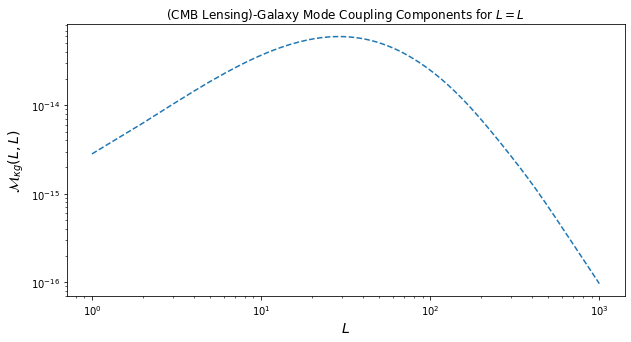

In [26]:
plt.figure()
plt.semilogy(ells1, np.abs(M_kg), linestyle="--")
plt.title("(CMB Lensing)-Galaxy Mode Coupling Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}_\kappa g(L,L)$", fontsize=14)

plt.figure()
plt.loglog(ells1, np.abs(M_kg), linestyle="--")
plt.title("(CMB Lensing)-Galaxy Mode Coupling Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}_{\kappa g}(L,L)$", fontsize=14)

plt.show()

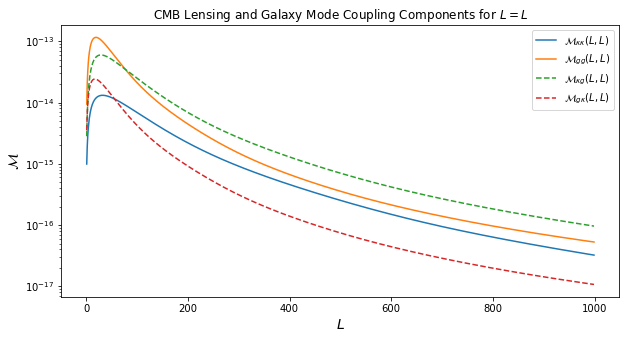

In [38]:
plt.figure()
M_kk = mode.components(ells1, ells2, typ="kappa-kappa", Nchi=100)
plt.semilogy(ells1, M_kk, label="$\mathcal{M}_{\kappa \kappa}(L,L)$")
plt.semilogy(ells1, M_gg, label="$\mathcal{M}_{gg}(L,L)$")
plt.semilogy(ells1, np.abs(M_kg), linestyle="--", label="$\mathcal{M}_{\kappa g}(L,L)$")
plt.semilogy(ells1, np.abs(M_gk), linestyle="--", label="$\mathcal{M}_{g \kappa}(L,L)$")
plt.title("CMB Lensing and Galaxy Mode Coupling Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}$", fontsize=14)
plt.legend()
plt.show()

In [27]:
mode = Modecoupling()
ells1 = np.arange(1, 1000, 1)
ells2 = ells1
M_II = mode.components(ells1, ells2, typ="cib-cib", Nchi=100)

/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:121: RuntimeWarning: overflow encountered in exp
  small_nu = (np.exp(thing) - 1) ** -1 * 2 * nu ** pow
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:121: RuntimeWarning: divide by zero encountered in reciprocal
  small_nu = (np.exp(thing) - 1) ** -1 * 2 * nu ** pow
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:122: RuntimeWarning: overflow encountered in exp
  big_nu = (np.exp(thing) - 1)**-1 * nu_prim**pow * (nu/nu_prim)**-alpha
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:122: RuntimeWarning: divide by zero encountered in reciprocal
  big_nu = (np.exp(thing) - 1)**-1 * nu_prim**pow * (nu/nu_prim)**-alpha


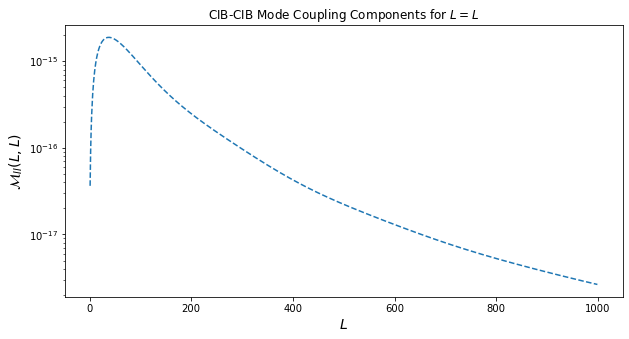

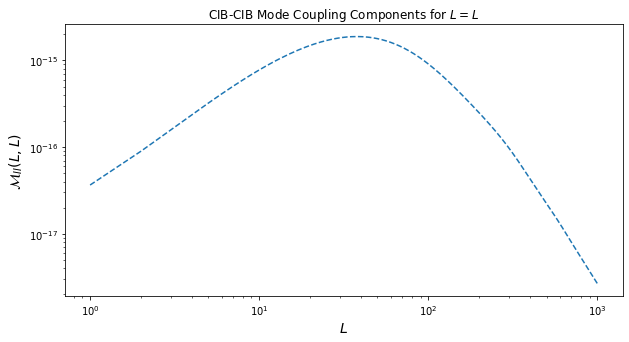

In [28]:
plt.figure()
plt.semilogy(ells1, np.abs(M_II), linestyle="--")
plt.title("CIB-CIB Mode Coupling Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}_{II}(L,L)$", fontsize=14)

plt.figure()
plt.loglog(ells1, np.abs(M_II), linestyle="--")
plt.title("CIB-CIB Mode Coupling Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}_{II}(L,L)$", fontsize=14)

plt.show()

In [29]:
mode = Modecoupling()
ells1 = np.arange(1, 1000, 1)
ells2 = ells1
M_Ik = mode.components(ells1, ells2, typ="cib-kappa", Nchi=100)

/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:121: RuntimeWarning: overflow encountered in exp
  small_nu = (np.exp(thing) - 1) ** -1 * 2 * nu ** pow
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:121: RuntimeWarning: divide by zero encountered in reciprocal
  small_nu = (np.exp(thing) - 1) ** -1 * 2 * nu ** pow
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:122: RuntimeWarning: overflow encountered in exp
  big_nu = (np.exp(thing) - 1)**-1 * nu_prim**pow * (nu/nu_prim)**-alpha
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:122: RuntimeWarning: divide by zero encountered in reciprocal
  big_nu = (np.exp(thing) - 1)**-1 * nu_prim**pow * (nu/nu_prim)**-alpha


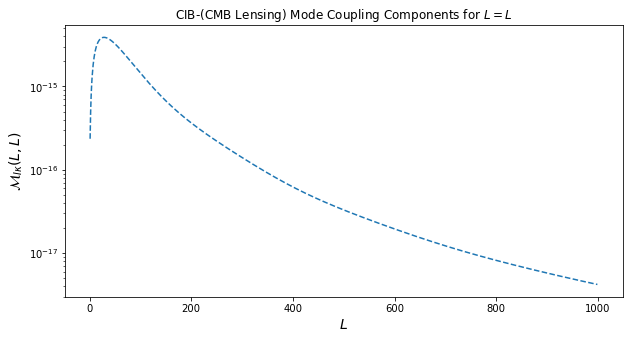

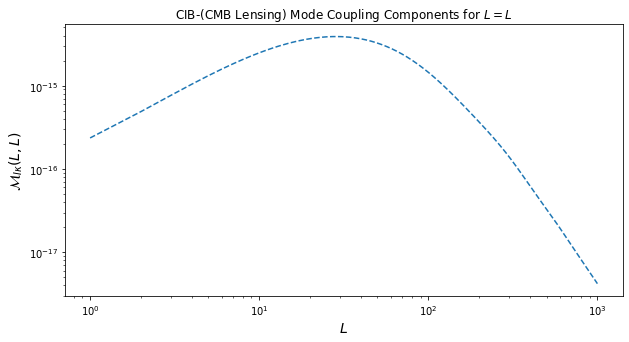

In [33]:
plt.figure()
plt.semilogy(ells1, np.abs(M_Ik), linestyle="--")
plt.title("CIB-(CMB Lensing) Mode Coupling Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}_{I\kappa}(L,L)$", fontsize=14)

plt.figure()
plt.loglog(ells1, np.abs(M_Ik), linestyle="--")
plt.title("CIB-(CMB Lensing) Mode Coupling Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}_{I\kappa}(L,L)$", fontsize=14)

plt.show()

In [31]:
mode = Modecoupling()
ells1 = np.arange(1, 1000, 1)
ells2 = ells1
M_kI = mode.components(ells1, ells2, typ="kappa-cib", Nchi=100)

/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:121: RuntimeWarning: overflow encountered in exp
  small_nu = (np.exp(thing) - 1) ** -1 * 2 * nu ** pow
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:121: RuntimeWarning: divide by zero encountered in reciprocal
  small_nu = (np.exp(thing) - 1) ** -1 * 2 * nu ** pow
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:122: RuntimeWarning: overflow encountered in exp
  big_nu = (np.exp(thing) - 1)**-1 * nu_prim**pow * (nu/nu_prim)**-alpha
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:122: RuntimeWarning: divide by zero encountered in reciprocal
  big_nu = (np.exp(thing) - 1)**-1 * nu_prim**pow * (nu/nu_prim)**-alpha


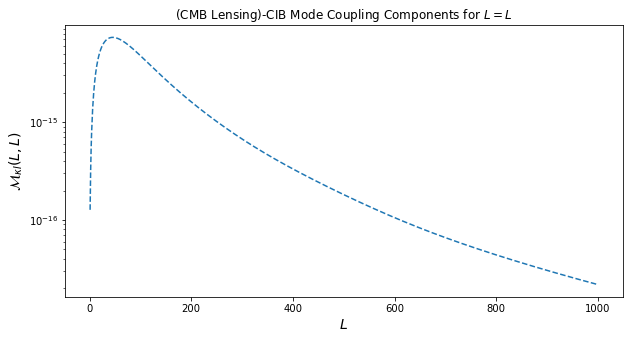

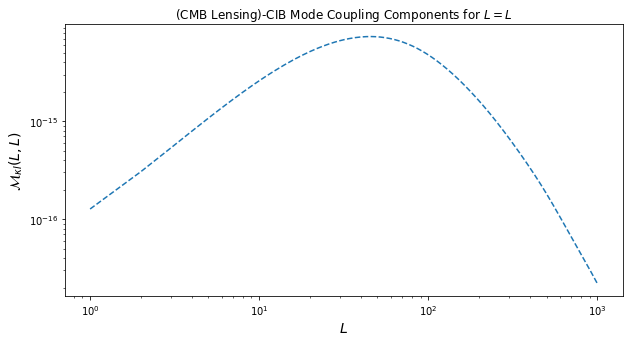

In [32]:
plt.figure()
plt.semilogy(ells1, np.abs(M_kI), linestyle="--")
plt.title("(CMB Lensing)-CIB Mode Coupling Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}_{\kappa I}(L,L)$", fontsize=14)

plt.figure()
plt.loglog(ells1, np.abs(M_kI), linestyle="--")
plt.title("(CMB Lensing)-CIB Mode Coupling Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}_{\kappa I}(L,L)$", fontsize=14)

plt.show()

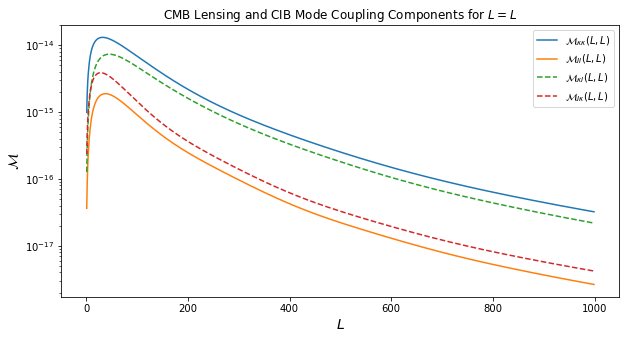

In [39]:
plt.figure()
plt.semilogy(ells1, M_kk, label="$\mathcal{M}_{\kappa \kappa}(L,L)$")
plt.semilogy(ells1, M_II, label="$\mathcal{M}_{II}(L,L)$")
plt.semilogy(ells1, np.abs(M_kI), linestyle="--", label="$\mathcal{M}_{\kappa I}(L,L)$")
plt.semilogy(ells1, np.abs(M_Ik), linestyle="--", label="$\mathcal{M}_{I\kappa}(L,L)$")
plt.title("CMB Lensing and CIB Mode Coupling Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}$", fontsize=14)
plt.legend()
plt.show()

In [8]:
from bispectra import Bispectra
bi = Bispectra()

In [9]:
ells1 = np.arange(2, 10001)
ells2 = ells1/2
ells3 = 1000
bi_ggw = bi.get_gal_rotation_bispectrum(ells1, ells2, ells3, M_spline=True)

/Users/mr671/Documents/repos/omegaQE/kkomega/bispectra.py:40: RuntimeWarning: invalid value encountered in sqrt
  return 2 * np.sqrt(s*(s-mag1)*(s-mag2)*(s-mag3))


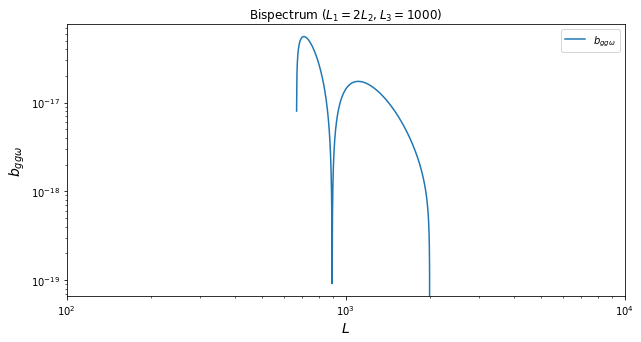

In [10]:
plt.figure()
plt.loglog(ells1, np.abs(bi_ggw), label="$b_{gg\omega}$")
plt.title("Bispectrum ($L_1=2L_2, L_3=1000$)")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$b_{gg\omega}$", fontsize=14)
plt.xlim(1e2, 1e4)
plt.legend()
plt.show()

/Users/mr671/Documents/repos/omegaQE/kkomega/bispectra.py:40: RuntimeWarning: invalid value encountered in sqrt
  return 2 * np.sqrt(s*(s-mag1)*(s-mag2)*(s-mag3))


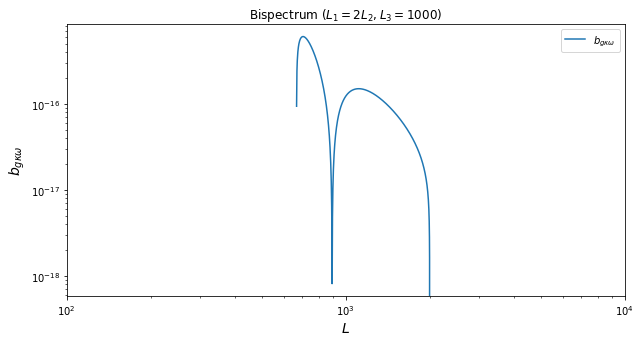

In [14]:
bi_gkw = bi.get_gal_convergence_rotation_bispectrum(ells1, ells2, ells3, M_spline=True)
plt.figure()
plt.loglog(ells1, np.abs(bi_gkw), label="$b_{g\kappa\omega}$")
plt.title("Bispectrum ($L_1=2L_2, L_3=1000$)")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$b_{g\kappa\omega}$", fontsize=14)
plt.xlim(1e2, 1e4)
plt.legend()
plt.show()

/Users/mr671/Documents/repos/omegaQE/kkomega/bispectra.py:40: RuntimeWarning: invalid value encountered in sqrt
  return 2 * np.sqrt(s*(s-mag1)*(s-mag2)*(s-mag3))


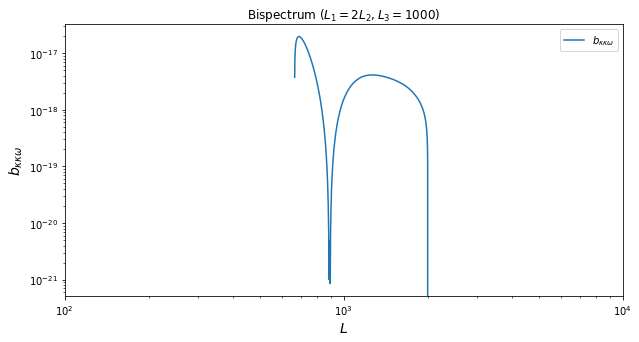

In [15]:
bi_kkw = bi.get_convergence_rotation_bispectrum(ells1, ells2, ells3, M_spline=True)
plt.figure()
plt.loglog(ells1, np.abs(bi_kkw), label="$b_{\kappa\kappa\omega}$")
plt.title("Bispectrum ($L_1=2L_2, L_3=1000$)")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$b_{\kappa\kappa\omega}$", fontsize=14)
plt.xlim(1e2, 1e4)
plt.legend()
plt.show()

/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:121: RuntimeWarning: overflow encountered in exp
  small_nu = (np.exp(thing) - 1) ** -1 * 2 * nu ** pow
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:121: RuntimeWarning: divide by zero encountered in reciprocal
  small_nu = (np.exp(thing) - 1) ** -1 * 2 * nu ** pow
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:122: RuntimeWarning: overflow encountered in exp
  big_nu = (np.exp(thing) - 1)**-1 * nu_prim**pow * (nu/nu_prim)**-alpha
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:122: RuntimeWarning: divide by zero encountered in reciprocal
  big_nu = (np.exp(thing) - 1)**-1 * nu_prim**pow * (nu/nu_prim)**-alpha
/Users/mr671/Documents/repos/omegaQE/kkomega/bispectra.py:40: RuntimeWarning: invalid value encountered in sqrt
  return 2 * np.sqrt(s*(s-mag1)*(s-mag2)*(s-mag3))


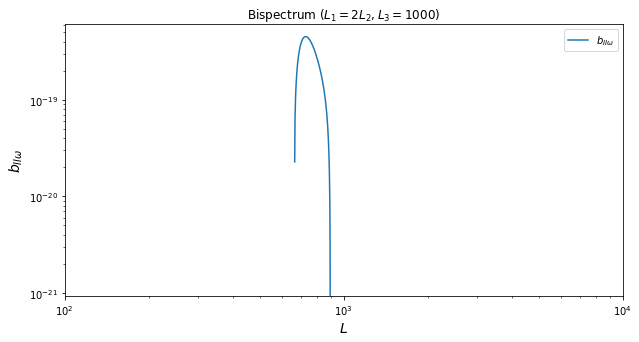

In [11]:
bi_IIw = bi.get_cib_rotation_bispectrum(ells1, ells2, ells3, M_spline=True)
plt.figure()
plt.loglog(ells1, bi_IIw, label="$b_{II\omega}$")
plt.title("Bispectrum ($L_1=2L_2, L_3=1000$)")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$b_{II\omega}$", fontsize=14)
plt.xlim(1e2, 1e4)
plt.legend()
plt.show()

/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:121: RuntimeWarning: overflow encountered in exp
  small_nu = (np.exp(thing) - 1) ** -1 * 2 * nu ** pow
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:121: RuntimeWarning: divide by zero encountered in reciprocal
  small_nu = (np.exp(thing) - 1) ** -1 * 2 * nu ** pow
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:122: RuntimeWarning: overflow encountered in exp
  big_nu = (np.exp(thing) - 1)**-1 * nu_prim**pow * (nu/nu_prim)**-alpha
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:122: RuntimeWarning: divide by zero encountered in reciprocal
  big_nu = (np.exp(thing) - 1)**-1 * nu_prim**pow * (nu/nu_prim)**-alpha
/Users/mr671/Documents/repos/omegaQE/kkomega/bispectra.py:40: RuntimeWarning: invalid value encountered in sqrt
  return 2 * np.sqrt(s*(s-mag1)*(s-mag2)*(s-mag3))


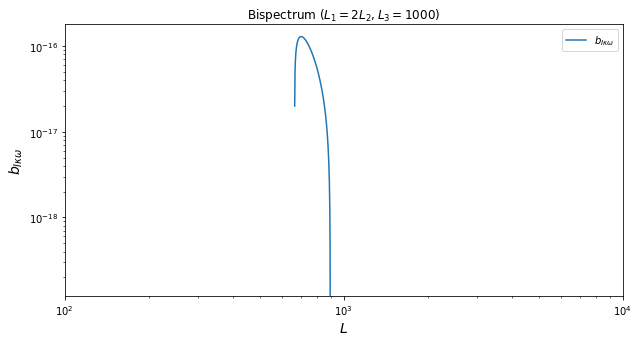

In [12]:
bi_Ikw = bi.get_cib_convergence_rotation_bispectrum(ells1, ells2, ells3, M_spline=True)
plt.figure()
plt.loglog(ells1, bi_Ikw, label="$b_{I\kappa\omega}$")
plt.title("Bispectrum ($L_1=2L_2, L_3=1000$)")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$b_{I\kappa\omega}$", fontsize=14)
plt.xlim(1e2, 1e4)
plt.legend()
plt.show()

In [20]:
ells2 = ells1
ells3 = ells1
bi_kkk = bi.get_convergence_bispectrum(ells1, ells2, ells3, M_spline=True)
bi_gkw = bi.get_gal_convergence_rotation_bispectrum(ells1, ells2, ells3, M_spline=True)
bi_Ikw = bi.get_cib_convergence_rotation_bispectrum(ells1, ells2, ells3, M_spline=True)

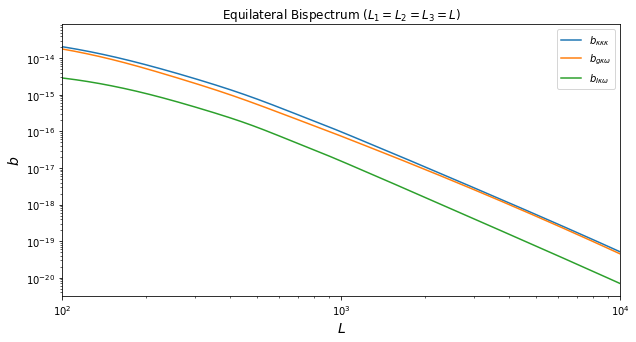

In [21]:
plt.figure()
plt.loglog(ells1, np.abs(bi_kkk), label="$b_{\kappa\kappa\kappa}$")
plt.loglog(ells1, np.abs(bi_gkw), label="$b_{g\kappa\omega}$")
plt.loglog(ells1, np.abs(bi_Ikw), label="$b_{I\kappa\omega}$")
plt.title("Equilateral Bispectrum ($L_1=L_2=L_3=L$)")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$b$", fontsize=14)
plt.xlim(1e2, 1e4)
plt.legend()
plt.show()

In [22]:
def get_L3s(L1, L2, steps):
    Lmin = np.floor(np.abs(L1 - L2)) + 1
    Lmax = np.ceil(L1 + L2)
    L3s = np.arange(Lmin, Lmax, steps, dtype=int)
    Lmid = L1//2
    Lrange = Lmid - L3s[0]
    return L3s[np.where(L3s <= Lmid + Lrange)]

def get_bi_slice(L1, steps, typ):
    bi_slice = np.empty((L1 + 1, L1 + 1))
    bi_slice[:] = np.nan
    L2s = np.arange(L1//2, L1 + 1, steps, dtype=int)
    for L2 in L2s:
        L3s = get_L3s(L1, L2, steps)
        if typ == "rot":
            bi_slice[L2, L3s] = bi.get_convergence_rotation_bispectrum(L1, L2, L3s, M_spline=True)
        elif typ == "conv":
            bi_slice[L2, L3s] = bi.get_convergence_bispectrum(L1, L2, L3s, M_spline=True)
        elif typ == "ggw":
            bi_slice[L2, L3s] = bi.get_gal_rotation_bispectrum(L1, L2, L3s, M_spline=True)
        elif typ == "gkw":
            bi_slice[L2, L3s] = bi.get_gal_convergence_rotation_bispectrum(L1, L2, L3s, M_spline=True)
        elif typ == "IIw":
            bi_slice[L2, L3s] = bi.get_cib_rotation_bispectrum(L1, L2, L3s, M_spline=True)
        elif typ == "Ikw":
            bi_slice[L2, L3s] = bi.get_cib_convergence_rotation_bispectrum(L1, L2, L3s, M_spline=True)
    return bi_slice

In [23]:
plt.rcParams['figure.figsize'] = [10,4]
def slice_plot(L1, steps, bispectrum = "rot", interpolation="nearest"):
    bi_slice = get_bi_slice(L1, steps, typ=bispectrum)
    masked_slice = np.ma.array(bi_slice, mask=np.isnan(bi_slice))
    plt.figure()
    cmap = matplotlib.cm.jet
    cmap = matplotlib.cm.get_cmap("jet").copy()
    cmap.set_bad('white',1.)
    plt.imshow(masked_slice[L1//2:, :], interpolation=interpolation, cmap=cmap, origin='lower', extent=[0, L1, L1//2, L1])
    plt.colorbar()

    x = np.arange(0,L1 + 1, steps)
    y = np.concatenate((np.arange(L1, L1//2, -steps), np.arange(L1//2, L1 + 1, steps)))
    plt.plot(x,y, linewidth=5, color='k')
    plt.xlabel("$L_3$")
    plt.ylabel("$L_2$")
    if bispectrum == "rot":
        plt.title(f"$b^{{\kappa\kappa\omega}}_{{L_1L_2L_3}}$ for L1 = {L1}")
    elif bispectrum == "conv":
        plt.title(f"$b^{{\kappa\kappa\kappa}}_{{L_1L_2L_3}}$ for L1 = {L1}")
    elif bispectrum == "ggw":
        plt.title(f"$b^{{gg\omega}}_{{L_1L_2L_3}}$ for L1 = {L1}")
    elif bispectrum == "gkw":
        plt.title(f"$b^{{g\kappa\omega}}_{{L_1L_2L_3}}$ for L1 = {L1}")
    elif bispectrum == "IIw":
        plt.title(f"$b^{{II\omega}}_{{L_1L_2L_3}}$ for L1 = {L1}")
    elif bispectrum == "Ikw":
        plt.title(f"$b^{{I\kappa\omega}}_{{L_1L_2L_3}}$ for L1 = {L1}")

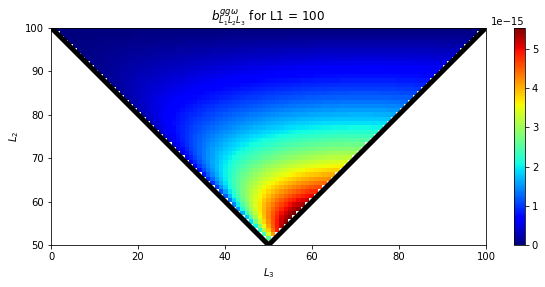

In [24]:
L1 = 100
slice_plot(L1, steps=1, bispectrum="ggw")
plt.show()

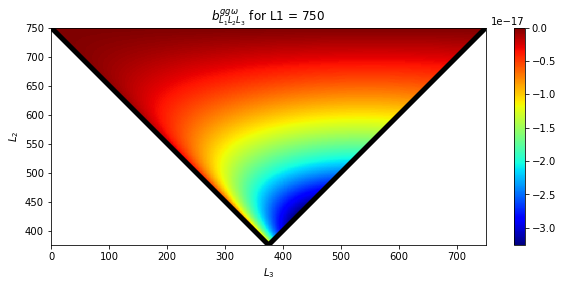

In [25]:
L1 = 750
slice_plot(L1, steps=1, bispectrum="ggw")
plt.show()

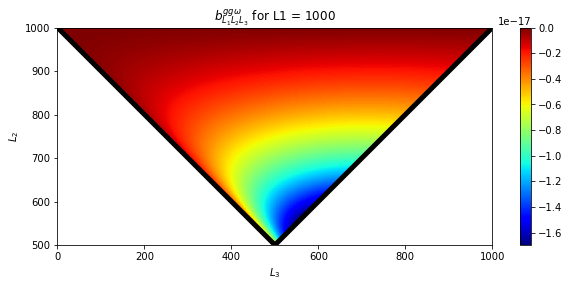

In [26]:
L1 = 1000
slice_plot(L1, steps=1, bispectrum="ggw")
plt.show()

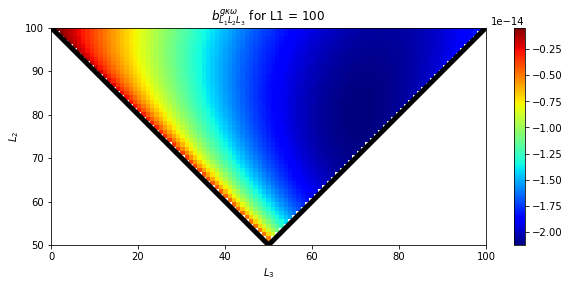

In [27]:
L1 = 100
slice_plot(L1, steps=1, bispectrum="gkw")
plt.show()

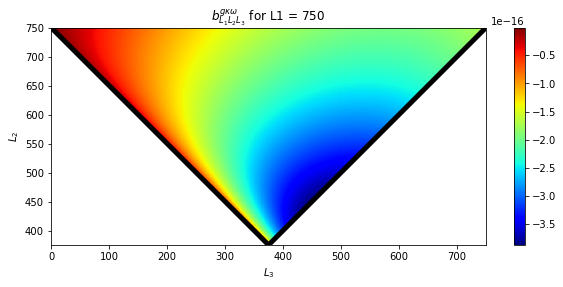

In [28]:
L1 = 750
slice_plot(L1, steps=1, bispectrum="gkw")
plt.show()

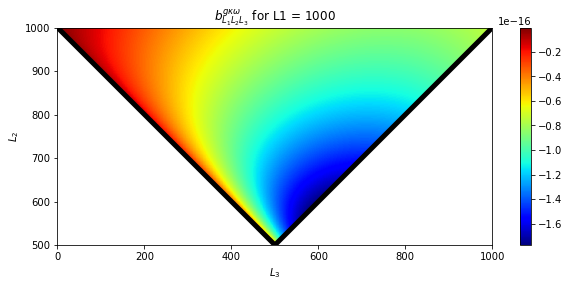

In [36]:
L1 = 1000
slice_plot(L1, steps=1, bispectrum="gkw")
plt.show()

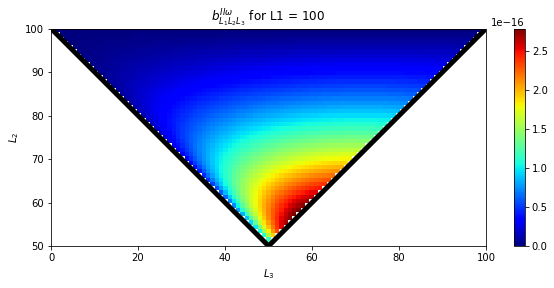

In [30]:
L1 = 100
slice_plot(L1, steps=1, bispectrum="IIw")
plt.show()

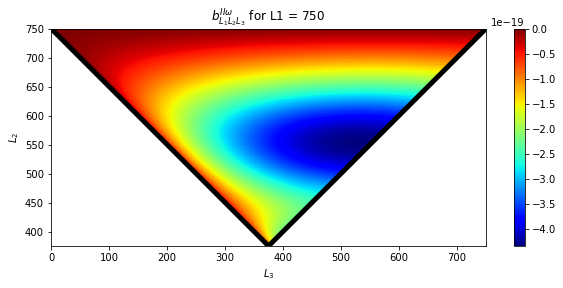

In [31]:
L1 = 750
slice_plot(L1, steps=1, bispectrum="IIw")
plt.show()

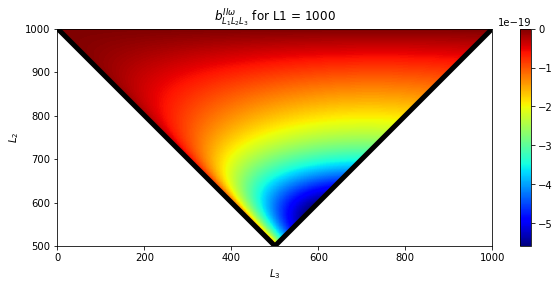

In [37]:
L1 = 1000
slice_plot(L1, steps=1, bispectrum="IIw")
plt.show()

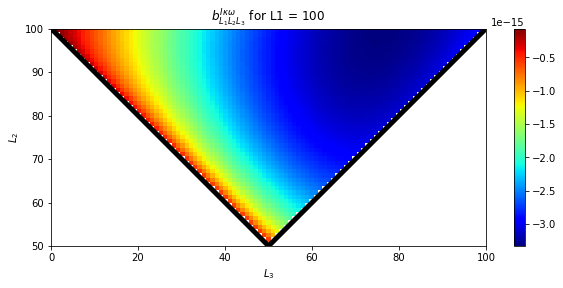

In [38]:
L1 = 100
slice_plot(L1, steps=1, bispectrum="Ikw")
plt.show()

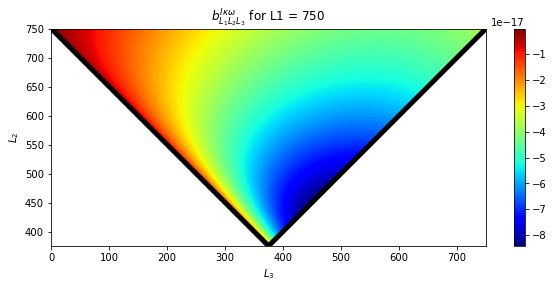

In [39]:
L1 = 750
slice_plot(L1, steps=1, bispectrum="Ikw")
plt.show()

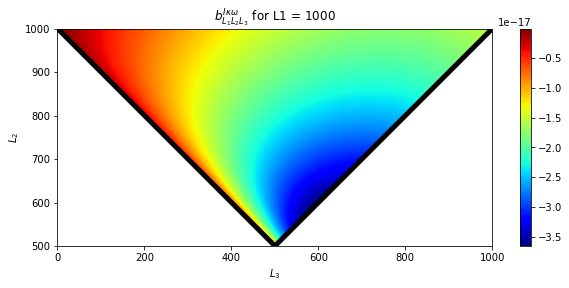

In [40]:
L1 = 1000
slice_plot(L1, steps=1, bispectrum="Ikw")
plt.show()